In [78]:
import pickle
import pandas as pd
from tqdm import tqdm
import numpy as np
import copy

In [2]:
pd.set_option('display.max_rows',500)

In [3]:
aui_info = []

with open('/data/Bodenreider_UMLS_DL/UMLS_VERSIONS/2020AB-ACTIVE/META/MRCONSO.RRF','r') as fp:
    
    for line in fp.readlines():
        line = line.split('|')
        cui = line[0]
        aui = line[7]
        string = line[-5]
        
        aui_info.append({'AUI':aui, 'CUI':cui, 'STR':string})
        
cui2sg = {}

with open('/data/Bodenreider_UMLS_DL/UMLS_VERSIONS/2020AB-ACTIVE/META/MRSTY.RRF','r') as fp:
    
    for line in fp.readlines():
        line = line.split('|')
        cui = line[0]
        sg = line[3]
        cui2sg[cui] = sg
        
original_umls = pickle.load(open('/data/Bodenreider_UMLS_DL/Interns/Vishesh/eval_umls/INTERSECT_AUI2ID.PICKLE','rb'))
new_auis = pickle.load(open('/data/Bodenreider_UMLS_DL/Interns/Vishesh/eval_umls/UNIQUE_AUI2ID.PICKLE','rb'))

aui_vecs  = pickle.load(open('/data/Bodenreider_UMLS_DL/Interns/Vishesh/eval_umls/AUI2LAYER.PICKLE','rb'))

all_2020_auis = set(original_umls.keys()).union(new_auis.keys())

cui2aui = {}
aui2cui = {}
aui2str = {}
aui2sg = {}

cui_sg = []
cui_aui = []

for tup in aui_info:
    aui = tup['AUI']
    
    if aui in all_2020_auis:        
        cui = tup['CUI']
        string = tup['STR']
        sg = cui2sg[cui]

        auis = cui2aui.get(cui, [])
        auis.append(aui)
        cui2aui[cui] = auis

        aui2cui[aui] = cui
        aui2str[aui] = string

        cui_sg.append((cui, sg))
        cui_aui.append((cui, aui))

In [4]:
len(aui_vecs)

8951355

In [5]:
len(original_umls), len(new_auis), len(original_umls) + len(new_auis)

(8521220, 430135, 8951355)

In [6]:
len(aui_vecs[8713809])

50

In [59]:
set(original_umls.values()).intersection(set(new_auis.values())), set(original_umls.keys()).intersection(set(new_auis.keys()))

(set(), set())

In [8]:
original_umls_2020 = []

for aui in original_umls.keys():
    original_umls_2020.append((aui, aui2str[aui]))
    
new_umls_2020 = []

for aui in new_auis.keys():
    new_umls_2020.append((aui, aui2str[aui]))

In [ ]:
# pickle.dump((original_umls_2020, new_umls_2020), open('aui_string_map_UMLS2020_update.p','wb'))

In [9]:
original_umls_cuis = set()

for aui in original_umls.keys():
    
    original_umls_cuis.add(aui2cui[aui])

In [10]:
new_aui2cui = {}

for aui in new_auis.keys():
    
    new_aui2cui[aui] = aui2cui[aui]

In [11]:
original_aui2cui = {}

for aui in original_umls.keys():
    
    original_aui2cui[aui] = aui2cui[aui]

In [12]:
len(original_umls_cuis)

3998197

In [13]:
original_synonym_dict = {}

for aui, cui in original_aui2cui.items():        
    
    auis = copy.deepcopy(cui2aui[cui])
    auis.remove(aui)
    
    original_synonym_dict[aui] = auis

In [14]:
new_synonym = []
new_concepts = []
new_synonym_dict = {}

for aui, cui in new_aui2cui.items():
    
    if cui in original_umls_cuis:
        new_synonym.append((aui, cui))
    else:
        new_concepts.append((aui, cui))
        
    
    auis = copy.deepcopy(cui2aui[cui])
    auis.remove(aui)
    
    new_synonym_dict[aui] = auis

In [15]:
len(new_synonym), len(new_concepts), len(new_aui2cui), len(new_synonym_dict)

(170077, 260058, 430135, 430135)

In [18]:
# pickle.dump(new_synonym_dict,open('new_umls_synonym_aui_dict.p','wb'))

In [19]:
# pickle.dump(original_synonym_dict,open('original_umls_synonym_aui_dict.p','wb'))

In [20]:
id_array = []
id2indices = {}
indices2id = {}

for val in original_umls.values():
    index = len(id2indices)
    id2indices[val] = index
    indices2id[index] = val
    
    id_array.append(val)

query_id_array = []
query_id2indices = {}
query_indices2id = {}

for val in new_auis.values():
    index = len(query_id2indices)
    query_id2indices[val] = index
    query_indices2id[index] = val
    
    query_id_array.append(val)

In [21]:
id2aui = {}
aui2id = {}

for aui, ide in original_umls.items():
    id2aui[ide] = aui
    aui2id[aui] = ide
    
for aui, ide in new_auis.items():
    id2aui[ide] = aui
    aui2id[aui] = ide

In [76]:
aui1 = 'A32032788'
aui2 = 'A3886267'
print(aui2str[aui1] + ' ||| ' + aui2str[aui2])
a,b = aui_vecs[aui2id[aui1]], aui_vecs[aui2id[aui2]]

from numpy import dot
from numpy.linalg import norm

1 - dot(a, b)/(norm(a)*norm(b)), np.linalg.norm(a - b,ord=1)

Tyromyces duracinus ||| Equine rhinitis B virus


(1.3113021850585938e-06, 0.13310081)

In [77]:
aui2 = 'A2704051'
print(aui2str[aui1] + ' ||| ' + aui2str[aui2])
a,b = aui_vecs[aui2id[aui1]], aui_vecs[aui2id[aui2]]

from numpy import dot
from numpy.linalg import norm

1 - dot(a, b)/(norm(a)*norm(b)), np.linalg.norm(a - b,ord=1)

Tyromyces duracinus ||| Cortinarius duracinus


(0.0007240176200866699, 3.8701441)

In [65]:
vecs = np.array(list(aui_vecs.values()))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

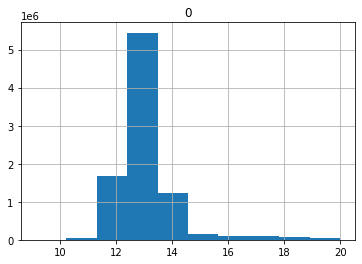

In [69]:
norms = np.linalg.norm(vecs,axis=1)
norms = pd.DataFrame(norms)
norms[norms[0] < 20].hist()

In [35]:
aui_vecs[aui2id['A31633223']], aui_vecs[aui2id['A21415194']]

(array([2.319861  , 0.9865504 , 3.3021483 , 1.0974923 , 2.8918543 ,
        2.0947633 , 1.3334606 , 0.81054145, 2.6437688 , 2.866139  ,
        0.8055932 , 1.0096594 , 0.63600445, 2.5685222 , 0.962934  ,
        2.5148695 , 1.6114473 , 0.        , 2.714445  , 1.32529   ,
        0.6387818 , 1.9068384 , 1.2631507 , 1.0672233 , 0.79591024,
        1.743697  , 0.9684314 , 1.5937718 , 1.3703375 , 3.1683407 ,
        1.5356684 , 0.6817032 , 0.75330794, 0.6834119 , 1.2999877 ,
        1.0478973 , 1.2225921 , 1.4411826 , 1.7184582 , 2.9218323 ,
        2.6076431 , 2.8134613 , 1.4997447 , 0.        , 1.5726087 ,
        1.254936  , 0.83537954, 1.0900419 , 1.4366422 , 2.0053282 ],
       dtype=float32),
 array([2.3185282 , 0.9907217 , 3.3061783 , 1.1016566 , 2.898062  ,
        2.0934238 , 1.3321483 , 0.8053138 , 2.649978  , 2.8723588 ,
        0.800385  , 1.0138271 , 0.6400974 , 2.567303  , 0.95767134,
        2.5210822 , 1.6101199 , 0.        , 2.720676  , 1.3239717 ,
        0.6429114 , 1.90

In [46]:
dts = np.array(list(aui_vecs.values())) - aui_vecs[aui2id['A31633223']]

KeyboardInterrupt: 

In [50]:
dts = np.linalg.norm(dts,axis=1)

In [51]:
dts = pd.DataFrame(dts)

In [53]:
dts.describe()

,0
count,8.951355e+06
mean,2.065149e+00
std,2.560961e+00
min,0.000000e+00
25%,9.249019e-01
50%,1.355683e+00
75%,2.034981e+00
max,5.225473e+01


In [55]:
dts[dts[0] == 0]

,0
5751190,0.0
5751191,0.0


In [ ]:
lex_lm_array = []

for val in id_array:
    
    lex_lm_array.append(aui_vecs[val])

lex_lm_array = np.array(lex_lm_array)

In [ ]:
query_lex_lm_array = []

for val in query_id_array:
    
    query_lex_lm_array.append(aui_vecs[val])

query_lex_lm_array = np.array(query_lex_lm_array)

In [ ]:
# import pickle
# import pandas as pd
# from tqdm import tqdm
# import numpy as np

# d = 50                           # dimension
# nb = 8521220                      # database size
# nq = 430000                     # nb of queries
# np.random.seed(1234)             # make reproducible
# lex_lm_array = np.random.random((nb, d)).astype('float32')
# query_lex_lm_array = np.random.random((nq, d)).astype('float32')

In [ ]:
len(lex_lm_array), len(query_lex_lm_array)

In [ ]:
import faiss
print(faiss.get_num_gpus())

index = faiss.IndexFlatL2(50)   # build the index
# make it into a gpu index
res = faiss.StandardGpuResources()
index = faiss.index_cpu_to_gpu(res, 0, index)

print(index.is_trained)
index.add(lex_lm_array)
print(index.ntotal)

In [ ]:
k = 4                          # we want to see 4 nearest neighbors
D, I = index.search(lex_lm_array[35:40], k) # sanity check
print(I)
print(D)

In [ ]:
chunks = np.array_split(query_lex_lm_array,1000)

In [ ]:
k = 400             #we want to see 4 nearest neighbors

D, I = [],[]

for q in tqdm(chunks):
    d,i = index.search(q, k)
    
    D.append(d)
    I.append(i)

In [ ]:
len(chunks[0])

In [ ]:
k=2000

In [ ]:
# pickle.dump((I,D),open('/data/jimenezgutierb2/{}-NN.p'.format(str(k)),'wb'))

In [ ]:
I, D = pickle.load(open('/data/jimenezgutierb2/{}-NN.p'.format(str(k)),'rb'))

In [ ]:
nearest_neighbors = np.vstack(I)
nn_dist = np.vstack(D)

In [ ]:
nearest_neighbors.shape

In [ ]:
nearest_neighbors[0].shape

In [ ]:
nearest_neighbors

In [ ]:
nn_dist.shape

In [ ]:
nearest_neighbors_auis = []

for nn in tqdm(nearest_neighbors):
    nn_auis = [id2aui[indices2id[index]] for index in nn]
    
    nearest_neighbors_auis.append(nn_auis)

In [ ]:
pickle.dump(nn_dist,open('/data/Bodenreider_UMLS_DL/Interns/Bernal/lex_lm_2000-NN_dist.p','wb'))

In [ ]:
pickle.dump(nearest_neighbors_auis,open('/data/Bodenreider_UMLS_DL/Interns/Bernal/lex_lm_2000-NN.p','wb'))

In [ ]:
query_synonym_ids = []

for ide in query_id_array:
    
    aui = id2aui[ide]
    synonym_auis = new_synonym_dict[aui]
    
    synonym_ids = []
    for syn_aui in synonym_auis:
        ide = aui2id[syn_aui]
        
        if ide in id2indices:
            synonym_ids.append(id2indices[ide])
    
    query_synonym_ids.append(synonym_ids)

In [ ]:
#Calculating Recall @ 1,5,10,50,100
recall_array = []
closest_dist_true = []
closest_dist_false = []

for true_syn, top100, top100_dist in tqdm(zip(query_synonym_ids, nearest_neighbors, nn_dist)):
    
    true_syn = set(true_syn)
    
    if len(true_syn) > 0:
        recalls = []

        for n in [1,5,10,50,100,500,1000,2000]:

            topn = set(top100[:n])
            true_pos = topn.intersection(true_syn)

            recalls.append(len(true_pos)/len(true_syn))
         
        recall_array.append(recalls)
        closest_dist_true.append([top100_dist[0], np.mean(top100_dist)])
    else:
        closest_dist_false.append([top100_dist[0], np.mean(top100_dist)])

In [ ]:
len(recall_array)

In [ ]:
np.stack(recall_array).mean(axis=0)

In [ ]:
np.mean(closest_dist_true,axis=0)

In [ ]:
np.mean(closest_dist_false,axis=0)

In [ ]:
def same_sg_edge(aui1, aui2):
    
    cui1 = aui2cui[aui1]
    cui2 = aui2cui[aui2]

    sg1 = cui2sg[cui1]
    sg2 = cui2sg[cui2]
    
    if sg1 == sg2:
        return True
    else:
        return False

inter_sg_fps = []
intra_sg_fps = []

present = 0
total_edges = 0

for i, row in tqdm(fps.iterrows()):    
    aui1 = row['aui1']
    aui2 = row['aui2']
    
    total_edges += 1
    
    if aui1 in aui2cui and aui2 in aui2cui:
        
        if same_sg_edge(aui1, aui2):
            intra_sg_fps.append(row)
        else:
            inter_sg_fps.append(row)
            
        present += 1

In [ ]:
len(inter_sg_fps)

In [ ]:
len(intra_sg_fps)

In [ ]:
aui2cui['A24114892']